In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('air.csv',encoding = 'latin1')
df = dataset.copy()

C:\Users\dk\AppData\Local\Temp\ipykernel_12076\3790614941.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('air.csv',encoding = 'latin1')


In [31]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [35]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [36]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [37]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [38]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [39]:
df = df.dropna(axis = 0, subset = ['type'])
df = df.dropna(axis = 0, subset = ['location'])
df = df.dropna(axis = 0, subset = ['so2'])

In [40]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [45]:
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

KeyError: 'agency'

In [46]:
df.head()

,stn_code,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


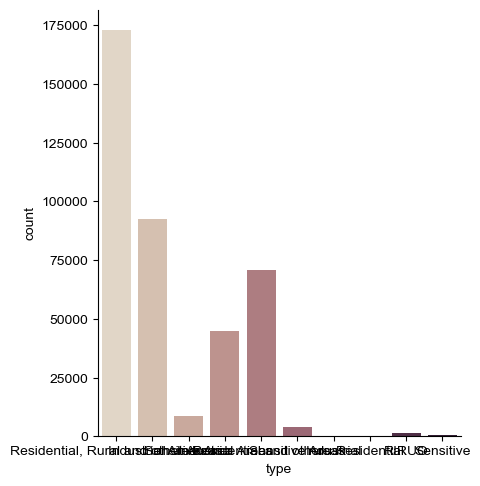

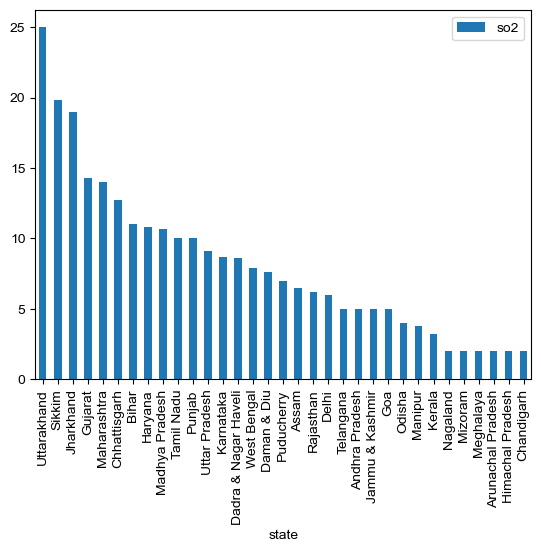

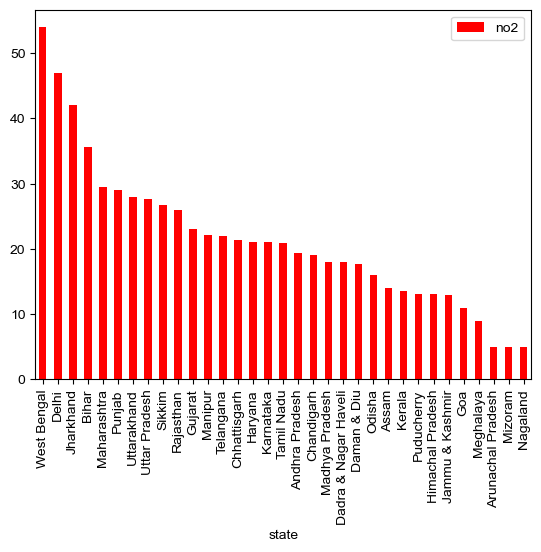

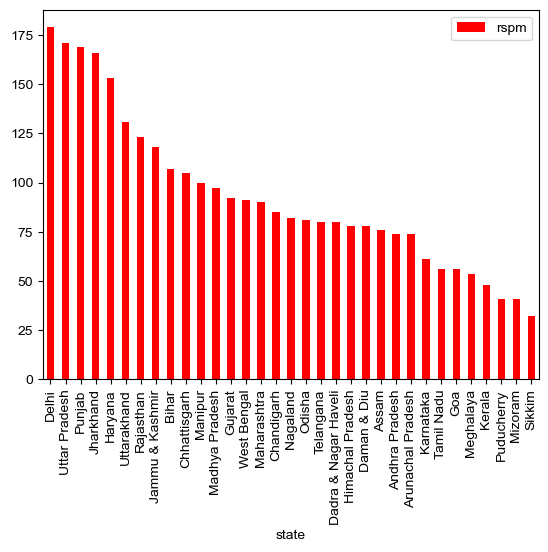

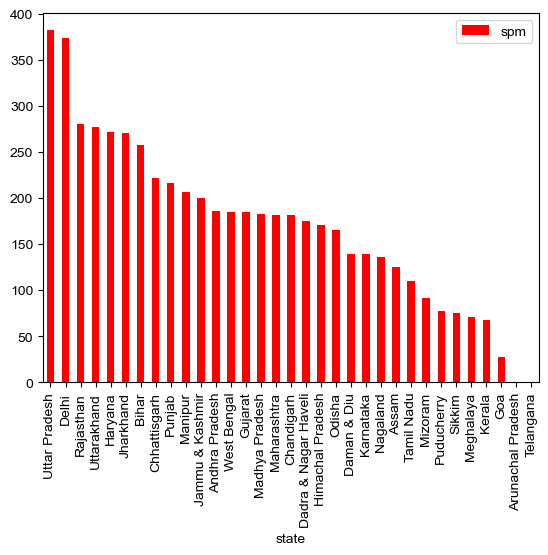

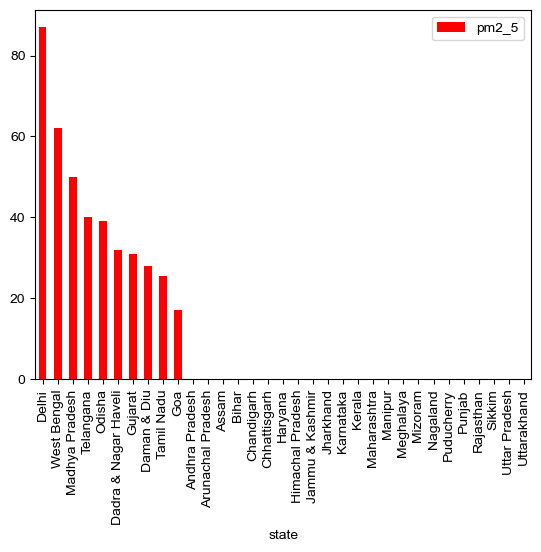

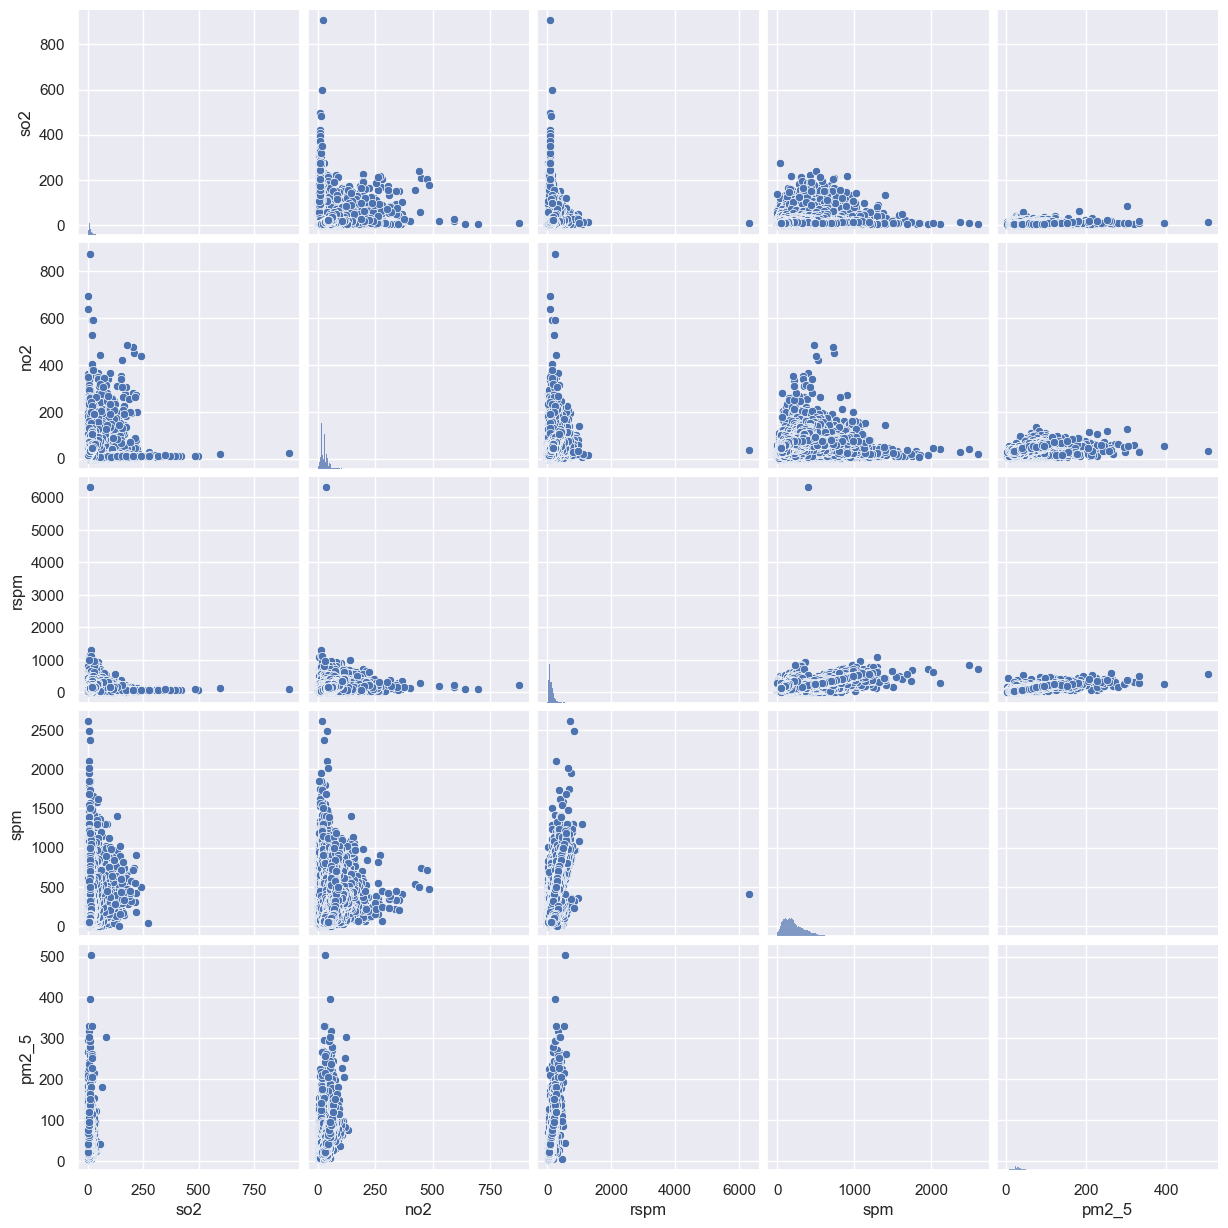

<AxesSubplot:>

In [48]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)
#barplot so2 vs state\
df[['so2', 'state']].groupby(['state']).median().sort_values("so2",  ascending = False).plot.bar()
#no2 vs state
df[['no2', 'state']].groupby(['state']).median().sort_values("no2",  ascending = False).plot.bar(color = 'r')
#rspm
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')
#spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm",  ascending = False).plot.bar(color = 'r')
#pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5",  ascending = False).plot.bar(color = 'r')

sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], height = 2.5)
plt.show()

corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)